In [3]:
# Importing libraries    
import numpy as np    
import matplotlib.pyplot as plt    
import pandas as pd  
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import numpy as np

In [4]:
# Importing the dataset  
dataset = pd.read_csv('Customers.csv')  

# Display the first few rows of the dataset
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Get a summary of the dataset
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
# Get information about the dataset
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
# Check for missing values
print(dataset.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_11744\689130245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


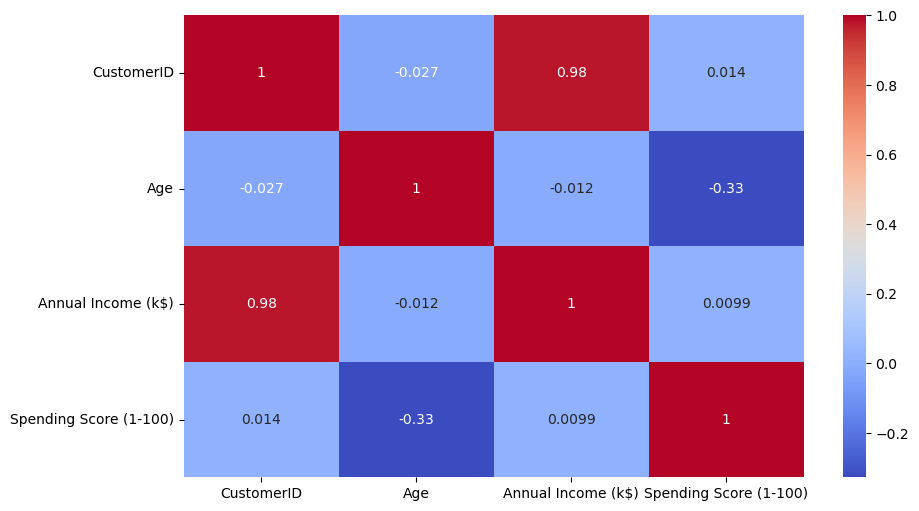

In [8]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

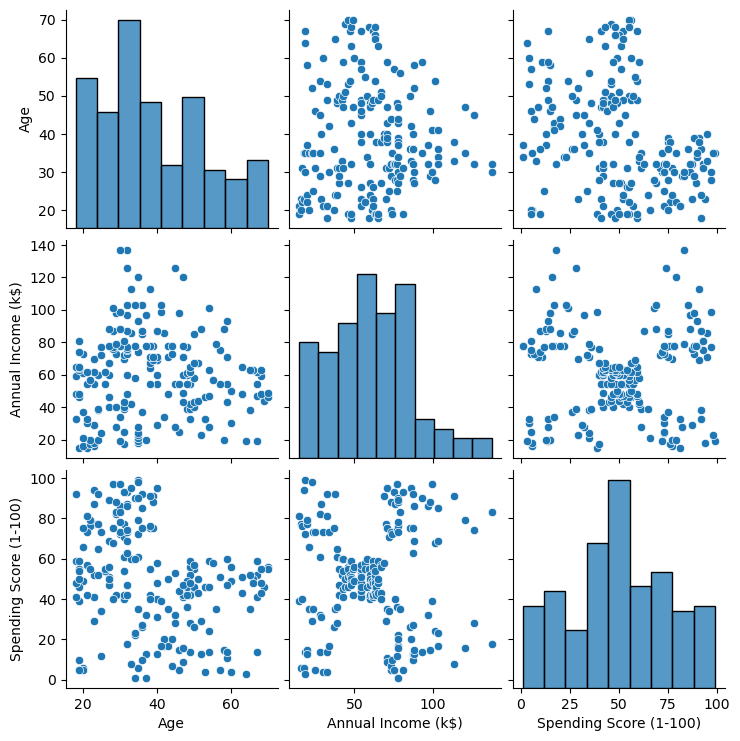

In [9]:
# Pairplot to visualize relationships
sns.pairplot(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [10]:
# Selecting features for clustering
x = dataset.iloc[:, [3, 4]].values  

In [11]:
# Finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list = []  # Initializing the list for the values of WCSS 

In [12]:
# Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_) 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

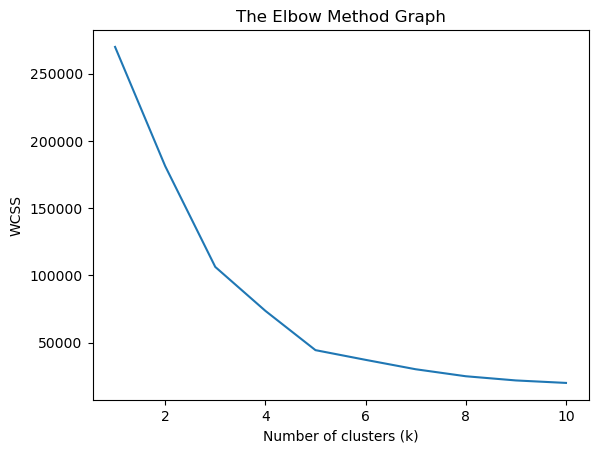

In [13]:
# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('WCSS')  
plt.show() 

In [14]:
# Training the K-means model on the dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  
y_predict = kmeans.fit_predict(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Adding the cluster assignments to the dataset
dataset['Cluster'] = y_predict

<Figure size 1000x600 with 0 Axes>

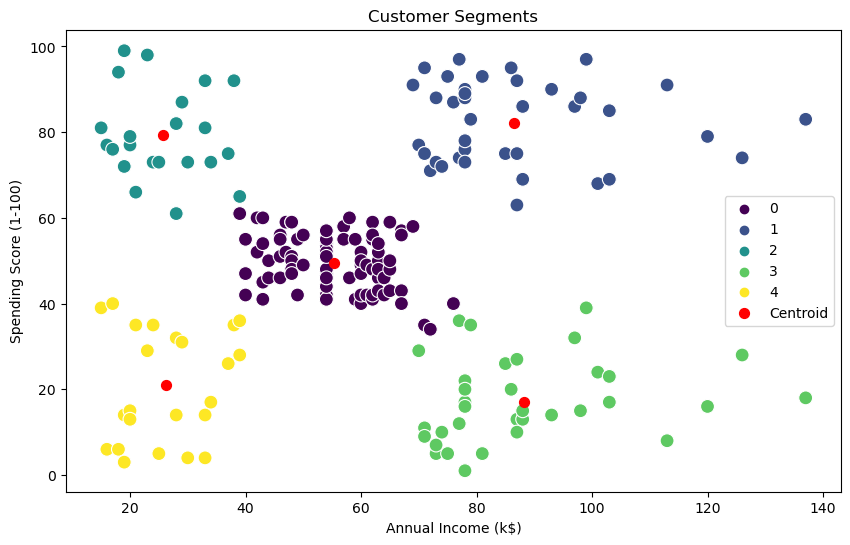

In [16]:
# Visualizing the clusters 
plt.figure(figsize=(10, 6))

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', label='Centroid')   
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

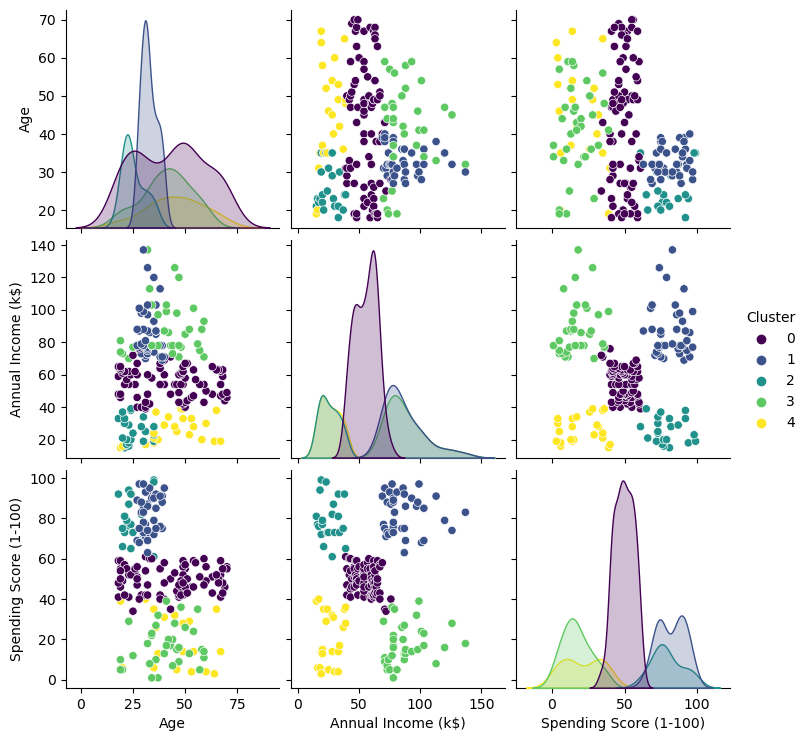

In [17]:
# Visualize the clusters in a pairplot
sns.pairplot(dataset, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='viridis')
plt.show()

In [18]:
# Calculate Inertia (already done in the elbow method)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 44448.45544793371


In [19]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(x, y_predict)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.553931997444648


In [20]:
# Function to calculate Dunn Index
def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_labels = np.unique(labels)
    
    intra_distances = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra_distances.append(np.max(pairwise_distances(cluster_points)))
        else:
            intra_distances.append(0)
    
    inter_distances = []
    for i, label1 in enumerate(unique_labels):
        for label2 in unique_labels[i+1:]:
            inter_distances.append(np.min(distances[np.ix_(labels == label1, labels == label2)]))
    
    return np.min(inter_distances) / np.max(intra_distances)

# Calculate Dunn Index
dunn_index_value = dunn_index(x, y_predict)
print(f'Dunn Index: {dunn_index_value}')

Dunn Index: 0.0584206237836986
